# 📊 Analyse des Cryptos avec CoinGecko
Ce notebook analyse Bitcoin, Ethereum et Solana à l'aide des indicateurs financiers suivants :
- **Moyenne mobile (SMA, EMA)**
- **Indice de force relative (RSI)**
- **Volatilité**

Les données proviennent de l'API **CoinGecko**.

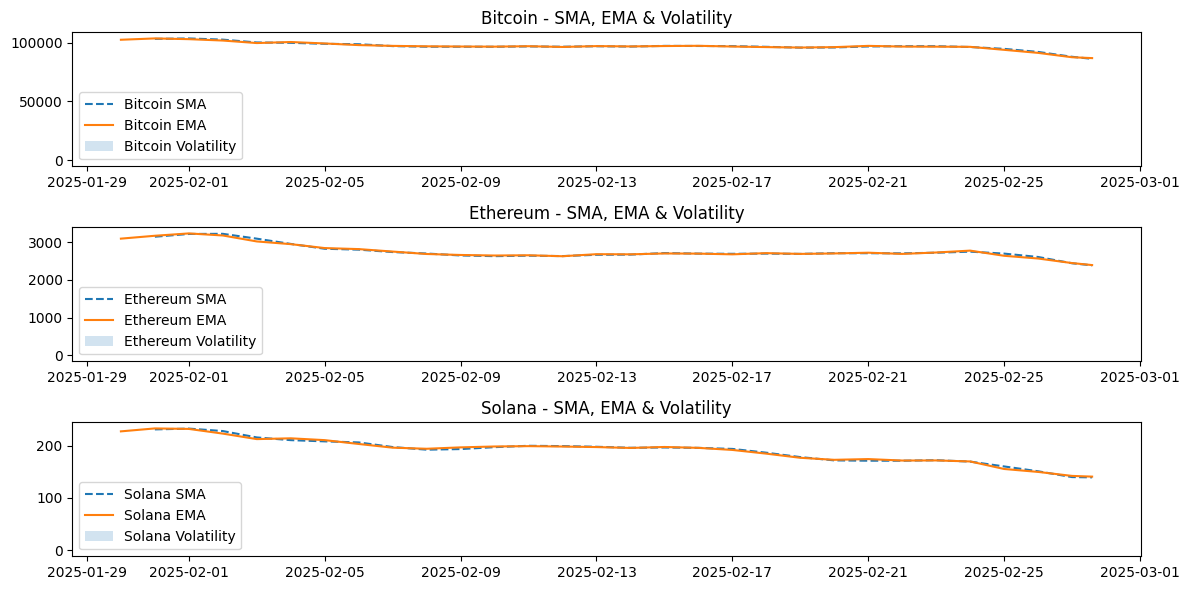

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime

# Request cryptocurrency prices API from CoinGecko
base_url = "https://api.coingecko.com/api/v3/coins/{}/market_chart"
params = {"vs_currency": "usd", "days": "30", "interval": "daily"}

# Get data
bitcoin_response = requests.get(base_url.format("bitcoin"), params=params)
ethereum_response = requests.get(base_url.format("ethereum"), params=params)
solana_response = requests.get(base_url.format("solana"), params=params)

# Define dictionary to store price data
cryptocurrency_data = {
    'Bitcoin': pd.DataFrame(),
    'Ethereum': pd.DataFrame(),
    'Solana': pd.DataFrame()
}

# Parse JSON response
for response, symbol in zip([bitcoin_response, ethereum_response, solana_response], ['Bitcoin', 'Ethereum', 'Solana']):
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data['prices'], columns=['Date', 'price'])
        df['Date'] = pd.to_datetime(df['Date'], unit='ms')  # Convert timestamp to datetime
        cryptocurrency_data[symbol] = df
    else:
        print(f"Failed to get data for {symbol}")

# Delete null data
for df in cryptocurrency_data.values():
    df.dropna(inplace=True)

# Remove duplicates
df_bitcoin = cryptocurrency_data['Bitcoin'].drop_duplicates(subset=['Date'], keep='first')
df_ethereum = cryptocurrency_data['Ethereum'].drop_duplicates(subset=['Date'], keep='first')
df_solana = cryptocurrency_data['Solana'].drop_duplicates(subset=['Date'], keep='first')

# Define dictionary to store moving averages
moving_averages = {symbol: {'SMA': [], 'EMA': []} for symbol in cryptocurrency_data}

# Calculate moving averages
for symbol, df in cryptocurrency_data.items():
    df.sort_values(by='Date', inplace=True)
    moving_averages[symbol]['SMA'] = df['price'].rolling(window=3).mean().values
    moving_averages[symbol]['EMA'] = df['price'].ewm(span=3, adjust=False).mean().values

# Define dictionary to store volatility
volatility = {symbol: df['price'].pct_change().dropna().values for symbol, df in cryptocurrency_data.items()}

# Merge moving averages and volatility into a DataFrame for visualization
final_data = pd.DataFrame({
    'Bitcoin_SMA': moving_averages['Bitcoin']['SMA'][1:],  # Décalage pour aligner
    'Bitcoin_EMA': moving_averages['Bitcoin']['EMA'][1:],
    'Bitcoin_Volatility': volatility['Bitcoin'],
    'Ethereum_SMA': moving_averages['Ethereum']['SMA'][1:],
    'Ethereum_EMA': moving_averages['Ethereum']['EMA'][1:],
    'Ethereum_Volatility': volatility['Ethereum'],
    'Solana_SMA': moving_averages['Solana']['SMA'][1:],
    'Solana_EMA': moving_averages['Solana']['EMA'][1:],
    'Solana_Volatility': volatility['Solana']
}, index=cryptocurrency_data['Bitcoin']['Date'][1:])  # Décalage de l'index aussi

# Plot the data
plt.figure(figsize=(12, 6))

# Plot Bitcoin trends
plt.subplot(3, 1, 1)
plt.plot(final_data.index, final_data['Bitcoin_SMA'], label='Bitcoin SMA', linestyle='dashed')
plt.plot(final_data.index, final_data['Bitcoin_EMA'], label='Bitcoin EMA', linestyle='solid')
plt.fill_between(final_data.index, final_data['Bitcoin_Volatility'], alpha=0.2, label="Bitcoin Volatility")
plt.legend()
plt.title("Bitcoin - SMA, EMA & Volatility")

# Plot Ethereum trends
plt.subplot(3, 1, 2)
plt.plot(final_data.index, final_data['Ethereum_SMA'], label='Ethereum SMA', linestyle='dashed')
plt.plot(final_data.index, final_data['Ethereum_EMA'], label='Ethereum EMA', linestyle='solid')
plt.fill_between(final_data.index, final_data['Ethereum_Volatility'], alpha=0.2, label="Ethereum Volatility")
plt.legend()
plt.title("Ethereum - SMA, EMA & Volatility")

# Plot Solana trends
plt.subplot(3, 1, 3)
plt.plot(final_data.index, final_data['Solana_SMA'], label='Solana SMA', linestyle='dashed')
plt.plot(final_data.index, final_data['Solana_EMA'], label='Solana EMA', linestyle='solid')
plt.fill_between(final_data.index, final_data['Solana_Volatility'], alpha=0.2, label="Solana Volatility")
plt.legend()
plt.title("Solana - SMA, EMA & Volatility")

plt.tight_layout()
plt.show()


In [8]:
print(len(moving_averages['Bitcoin']['SMA']))
print(len(moving_averages['Bitcoin']['EMA']))
print(len(volatility['Bitcoin']))
print(len(cryptocurrency_data['Bitcoin']['Date'][1:]))  # Vérifie la longueur de l'index

31
31
30
30


In [11]:
import google.generativeai as genai
import os

API_KEY = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=API_KEY)

models = genai.list_models()
for model in models:
    print(model.name)  # Vérifie les modèles disponibles

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental
models/embedding-001
models/text-embedding-004
models/aqa
models/imagen-3.

In [12]:
# Généré un audio descriptif de mes graphique grace a Gemini
import google.generativeai as genai  # API Gemini
from gtts import gTTS
import os

# RÉCUPÉRATION DE LA CLÉ API DE L'ENVIRONNEMENT

API_KEY = os.getenv("GEMINI_API_KEY")  # Assure-toi que ta clé est stockée dans l'environnement
genai.configure(api_key=API_KEY)

# GÉNÉRATION AUTOMATIQUE DE LA DESCRIPTION DES TENDANCES
description = (
    f"Analyse des tendances des cryptomonnaies Bitcoin, Ethereum et Solana sur les 30 derniers jours :\n\n"
    f"- Bitcoin : Prix initial {cryptocurrency_data['Bitcoin']['price'].iloc[0]:.2f} EUR, Prix final {cryptocurrency_data['Bitcoin']['price'].iloc[-1]:.2f} EUR. "
    f"Volatilité moyenne : {volatility['Bitcoin'].mean():.4f}.\n\n"
    f"- Ethereum : Prix initial {cryptocurrency_data['Ethereum']['price'].iloc[0]:.2f} EUR, Prix final {cryptocurrency_data['Ethereum']['price'].iloc[-1]:.2f} EUR. "
    f"Volatilité moyenne : {volatility['Ethereum'].mean():.4f}.\n\n"
    f"- Solana : Prix initial {cryptocurrency_data['Solana']['price'].iloc[0]:.2f} EUR, Prix final {cryptocurrency_data['Solana']['price'].iloc[-1]:.2f} EUR. "
    f"Volatilité moyenne : {volatility['Solana'].mean():.4f}.\n\n"
    f"Analyse demandée : Quels sont les signaux clés et tendances observés sur ces graphiques ? "
    f"Quels conseils peut-on en tirer pour un investisseur ?"
)

# ENVOI DE LA DESCRIPTION À GEMINI POUR ANALYSE
model = genai.GenerativeModel("gemini-2.0-flash")
response = model.generate_content(description)
analysis = response.text  # Récupération de l'analyse générée

# AFFICHAGE DE L'ANALYSE
print("🔍 Analyse par Gemini :\n")
print(analysis)

# CONVERTIR L'ANALYSE EN AUDIO AVEC gTTS
tts = gTTS(text=analysis, lang='fr')
audio_file = "analyse_crypto.mp3"
tts.save(audio_file)

# 🔊 LANCER LA LECTURE DU FICHIER AUDIO (SUR WINDOWS)
os.system(f"start {audio_file}")


🔍 Analyse par Gemini :

L'analyse des données sur les 30 derniers jours pour Bitcoin, Ethereum et Solana révèle des tendances claires et des signaux importants pour les investisseurs :

**Tendances Générales:**

*   **Tendance baissière:** Les trois cryptomonnaies ont connu une baisse significative de leur prix initial à leur prix final sur la période observée. Cette baisse est particulièrement marquée pour Solana.
*   **Volatilité négative:** La volatilité moyenne négative indique une tendance générale à la baisse des prix, confirmant l'observation précédente. Plus la volatilité négative est grande (Solana), plus la baisse a été prononcée.

**Signaux Clés:**

*   **Bitcoin (BTC):**
    *   **Stabilité relative (parmi les trois):** Bien que Bitcoin ait baissé, il a montré une volatilité négative moins importante que les deux autres. Cela suggère une relative stabilité par rapport à Ethereum et Solana.
    *   **Valeur Refuge potentielle (dans un contexte de baisse):** Dans un marché en

sh: 1: start: not found


32512

Sélectionnez une cryptomonnaie :
1. Bitcoin
2. Ethereum
3. Solana


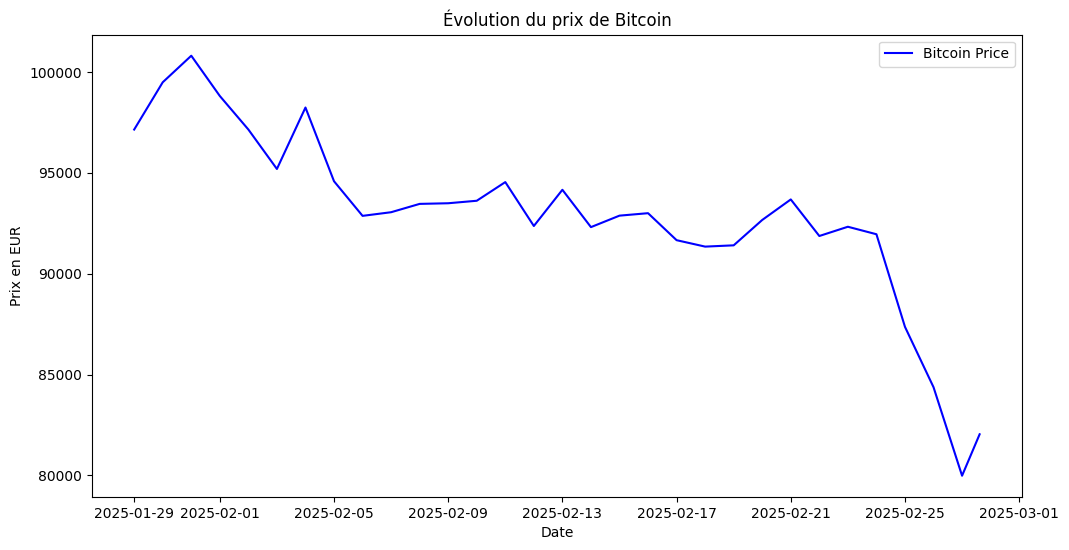


--- Analyse de Gemini ---
 L'analyse du prix du Bitcoin sur les 30 derniers jours nécessite de regarder plusieurs facteurs et dépend du jour exact où l'on effectue cette analyse.  Je ne peux pas accéder à des données en temps réel, y compris les cours du Bitcoin.  Donc, je ne peux pas vous donner une analyse précise et actuelle.

Cependant, je peux vous donner les éléments clés à considérer pour une telle analyse et vous indiquer où trouver les informations nécessaires :

**Facteurs clés pour l'analyse du prix du Bitcoin sur 30 jours :**

* **Tendance générale:** Le prix a-t-il globalement augmenté, diminué, ou est-il resté stable sur la période ?
* **Volatilité:** Le prix a-t-il fluctué de manière significative ?  Quelles ont été l'amplitude et la fréquence des variations ?
* **Points hauts et bas:** Quels ont été les prix les plus hauts et les plus bas atteints au cours des 30 derniers jours ?
* **Volume des transactions:** Le volume des transactions a-t-il augmenté ou diminué ?  Un

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import google.generativeai as genai
from gtts import gTTS
from datetime import datetime

# Configuration de l'API Gemini
API_KEY = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=API_KEY)

def get_crypto_data(symbol):
    """Récupère les données de marché pour une crypto donnée."""
    base_url = "https://api.coingecko.com/api/v3/coins/{}/market_chart"
    params = {"vs_currency": "eur", "days": "30", "interval": "daily"}
    response = requests.get(base_url.format(symbol), params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data['prices'], columns=['Date', 'price'])
        df['Date'] = pd.to_datetime(df['Date'], unit='ms')
        return df
    else:
        print(f"Erreur lors de la récupération des données pour {symbol}")
        return None

def plot_crypto(df, crypto_name):
    """Affiche un graphique de la crypto sélectionnée."""
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['price'], label=f'{crypto_name} Price', color='blue')
    plt.xlabel("Date")
    plt.ylabel("Prix en EUR")
    plt.title(f"Évolution du prix de {crypto_name}")
    plt.legend()
    plt.show()

def analyze_with_gemini(description):
    """Envoie une description à Gemini et récupère une analyse."""
    model = genai.GenerativeModel("gemini-1.5-pro")
    response = model.generate_content(description)
    return response.text

def convert_text_to_audio(text, filename="analysis.mp3"):
    """Convertit un texte en audio avec gTTS."""
    tts = gTTS(text, lang='fr')
    tts.save(filename)
    print(f"Analyse audio enregistrée sous {filename}")

def main():
    """Menu interactif pour l'utilisateur."""
    cryptos = {"1": "bitcoin", "2": "ethereum", "3": "solana"}
    print("Sélectionnez une cryptomonnaie :")
    print("1. Bitcoin")
    print("2. Ethereum")
    print("3. Solana")
    choice = input("Entrez le numéro de votre choix : ")
    
    if choice in cryptos:
        crypto_name = cryptos[choice].capitalize()
        df = get_crypto_data(cryptos[choice])
        if df is not None:
            plot_crypto(df, crypto_name)
            description = f"Analyse du prix de {crypto_name} sur les 30 derniers jours."
            analysis = analyze_with_gemini(description)
            print("\n--- Analyse de Gemini ---\n", analysis)
            convert_text_to_audio(analysis)
    else:
        print("Choix invalide. Veuillez réessayer.")

if __name__ == "__main__":
    main()
# Il faut choisir le numéro du type de crypto voulu et non écrire le nom corespondant à la crypto souhaité 